In [115]:
# import the necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import joblib

In [116]:
# load the dataset
data = pd.read_csv('admit_data3.csv')

In [117]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [118]:
# Define the input and output data
X = data.iloc[:, 1:8].values # select columns 1-7 with all rows
y = data.iloc[:, 8].values # select 8th column

In [119]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Train the linear regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [121]:
# make predictions on the testing set
y_pred = regressor.predict(X_test)
y_pred

array([0.54, 0.73, 0.94, 0.81, 0.59, 0.91, 0.59, 0.38, 0.7 , 0.91, 0.79,
       0.93, 0.49, 0.88, 0.76, 0.75, 0.69, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.63, 0.56, 0.95, 0.83, 0.7 , 0.67, 0.69, 0.76, 0.76, 0.94, 0.48,
       0.44, 0.72, 0.69, 0.72, 0.75, 0.71, 0.93, 0.76, 0.64, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.93, 0.91, 0.93, 0.72, 0.8 , 0.95, 0.7 ,
       0.6 , 0.7 , 0.83, 0.59, 0.88, 0.61, 0.65, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.89, 0.88, 0.85, 0.75, 0.84, 0.93, 0.9 , 0.52, 0.76, 0.77,
       0.53, 0.87, 0.87])

In [122]:
# calculate R-squared
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6568029793761099


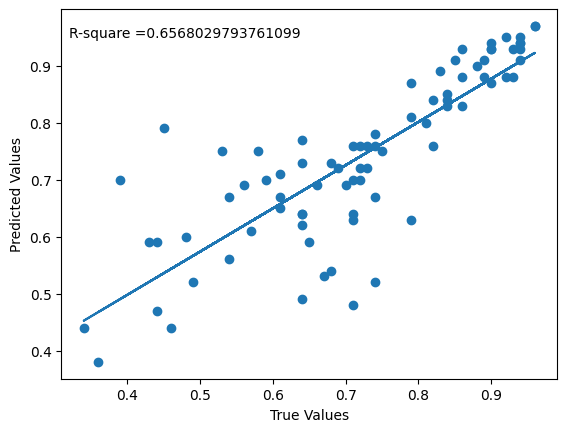

In [123]:
a, b = np.polyfit(y_test, y_pred, 1)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot(y_test, a*y_test+b)
plt.text(0.32, 0.95, 'R-square =' + str(accuracy))

plt.show()

In [124]:
# predict Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.0088625


In [125]:
# predict Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.06275


In [126]:
# predict Root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.09414085191881366


In [127]:
# function for precision at k
def precision_at_k(y_test, y_pred, k):

    # sort the prediction values by probability in descending order
    sorted_pred_values = np.argsort(y_pred)[::-1] 

    # select the top k sorted prediction values
    top_k_sorted_pred_values = sorted_pred_values[:k]

    # precision at k
    true_positives = np.sum(y_test[top_k_sorted_pred_values])
    precision_at_k = true_positives / k

    return precision_at_k

# precision at k=5
precision_at_5 = precision_at_k(y_test, y_pred, k=5)
print("precision_at_k=5: ", precision_at_5)


precision_at_k=5:  0.9359999999999999


In [128]:
# save model to disk
joblib.dump(model, "model.pkl")

['model.pkl']